# CSE 572: Homework 3

This notebook provides a template and starting code to implement the Homework 3 assignment.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button. 

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, click File > Print > Save as PDF.

## Real or spurious clusters?

An important question in assessing cluster validity is whether we are finding real patterns in structured data or finding patterns in noise or random data.

In this homework, you are given a dataset from an unknown source with unknown attributes. You are asked to cluster the data into 3 clusters using K-means clustering. Your goal is to evaluate whether the clusters you find in the dataset are due to real structure in the data or just patterns in noise. You can use any method we have discussed in class or in the Data Mining textbook to solve this problem. Show all of your work and then answer the question in the final Question cell.

In [82]:
import pandas as pd
import numpy as np
np.random.seed(0)

data = pd.read_csv('https://docs.google.com/uc?export=download&id=1aALuGEy92Z_Lk3BqeKx09IwgVZn615Z6', header=None)
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
26,80.0,125.0,172.0,82.0,127.0,0.0,60.0,42.0,244.0,130.0,...,185.0,51.0,93.0,149.0,7.0,231.0,20.0,68.0,175.0,39.0
86,44.0,216.0,97.0,191.0,203.0,80.0,4.0,244.0,240.0,13.0,...,210.0,248.0,16.0,234.0,251.0,108.0,95.0,83.0,247.0,151.0
2,27.0,161.0,104.0,91.0,223.0,162.0,228.0,0.0,219.0,139.0,...,129.0,78.0,53.0,80.0,191.0,230.0,84.0,87.0,70.0,130.0
55,74.0,75.0,209.0,174.0,1.0,249.0,151.0,126.0,135.0,32.0,...,161.0,8.0,69.0,97.0,218.0,92.0,140.0,75.0,196.0,211.0
75,90.0,214.0,61.0,20.0,136.0,22.0,240.0,211.0,130.0,19.0,...,150.0,162.0,41.0,109.0,62.0,167.0,149.0,86.0,74.0,198.0
93,254.0,17.0,71.0,100.0,48.0,246.0,132.0,133.0,193.0,13.0,...,251.0,144.0,47.0,250.0,200.0,37.0,83.0,9.0,183.0,120.0
16,207.0,234.0,191.0,105.0,43.0,218.0,31.0,36.0,44.0,107.0,...,246.0,181.0,242.0,55.0,235.0,241.0,27.0,180.0,109.0,198.0
73,224.0,55.0,154.0,62.0,245.0,181.0,215.0,194.0,30.0,59.0,...,91.0,3.0,70.0,138.0,234.0,0.0,17.0,211.0,205.0,113.0
54,9.0,250.0,224.0,168.0,143.0,234.0,120.0,195.0,223.0,94.0,...,21.0,204.0,159.0,60.0,159.0,172.0,78.0,207.0,102.0,227.0
95,111.0,126.0,126.0,167.0,11.0,252.0,183.0,253.0,79.0,5.0,...,34.0,167.0,222.0,0.0,31.0,88.0,204.0,148.0,214.0,215.0


In [83]:
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,83.0,230.0,40.0,201.0,182.0,232.0,31.0,237.0,204.0,91.0,...,35.0,224.0,56.0,13.0,60.0,22.0,166.0,31.0,94.0,206.0
1,0.0,149.0,6.0,32.0,98.0,252.0,32.0,142.0,31.0,78.0,...,23.0,106.0,29.0,42.0,166.0,4.0,93.0,32.0,50.0,85.0
2,27.0,161.0,104.0,91.0,223.0,162.0,228.0,0.0,219.0,139.0,...,129.0,78.0,53.0,80.0,191.0,230.0,84.0,87.0,70.0,130.0
3,187.0,173.0,23.0,230.0,23.0,88.0,85.0,234.0,247.0,227.0,...,170.0,209.0,30.0,180.0,128.0,9.0,102.0,169.0,157.0,224.0
4,152.0,109.0,4.0,247.0,130.0,212.0,113.0,1.0,169.0,99.0,...,231.0,190.0,71.0,41.0,47.0,41.0,126.0,120.0,240.0,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,111.0,126.0,126.0,167.0,11.0,252.0,183.0,253.0,79.0,5.0,...,34.0,167.0,222.0,0.0,31.0,88.0,204.0,148.0,214.0,215.0
96,97.0,246.0,196.0,237.0,109.0,128.0,212.0,201.0,109.0,225.0,...,207.0,231.0,78.0,229.0,157.0,213.0,190.0,42.0,31.0,69.0
97,160.0,47.0,230.0,196.0,207.0,247.0,102.0,243.0,116.0,84.0,...,57.0,10.0,29.0,117.0,71.0,155.0,217.0,154.0,146.0,124.0
98,252.0,192.0,155.0,141.0,222.0,102.0,107.0,16.0,10.0,53.0,...,208.0,81.0,174.0,241.0,164.0,131.0,133.0,62.0,91.0,241.0


In [84]:
print(data.describe())

               0           1           2          3           4           5   \
count  100.000000  100.000000  100.000000  100.00000  100.000000  100.000000   
mean   130.020000  138.900000  123.830000  121.27000  130.570000  144.940000   
std     72.851028   70.073627   71.871526   73.96257   77.144788   74.222137   
min      0.000000   14.000000    0.000000    1.00000    0.000000    0.000000   
25%     73.750000   82.750000   59.000000   54.50000   58.750000   85.000000   
50%    142.000000  135.500000  132.500000  112.00000  136.500000  160.500000   
75%    185.250000  198.500000  173.500000  190.25000  197.250000  207.000000   
max    254.000000  251.000000  253.000000  254.00000  252.000000  253.000000   

               6           7           8           9   ...          54  \
count  100.000000  100.000000  100.000000  100.000000  ...  100.000000   
mean   130.720000  128.090000  126.900000  119.940000  ...  128.140000   
std     76.064709   72.535898   77.044065   67.762482  ..

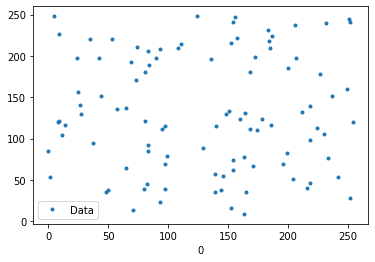

In [85]:
data.plot(x = 0, y = 63, style = '.', label='Data')

In [86]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = 3
seed = 0

k_means = KMeans(n_clusters=n_clusters, init='random', n_init=1, random_state=seed)
k_means.fit(data)

clusters = k_means.labels_
score = silhouette_score(data, clusters, metric='euclidean')

In [87]:
k_means.inertia_

32435472.25753639

In [88]:
print('Silhouetter Score : %.3f' % score)

Silhouetter Score : 0.016


In [89]:
from matplotlib import pyplot as plt

SSE_random = []

for i in range(500):
  np.random.seed(i)
  random_data = np.random.randint(data.min(), data.max(), size = (100,64))
  kmeans_temp = KMeans(n_clusters = 3, init='random', n_init=1, random_state = i)
  kmeans_model = kmeans_temp.fit(random_data) 
  interia = kmeans_model.inertia_
  SSE_random.append(interia)

In [90]:
SSE_random

[31174535.381086595,
 31122520.0230814,
 31426056.89115479,
 31168092.55424836,
 31815198.38354011,
 31110185.8800342,
 31505928.15629629,
 31512211.274231873,
 31052763.530710325,
 31374819.56857436,
 32479037.134279676,
 30935897.50064186,
 31204606.977898553,
 31059669.41785714,
 31268191.209523816,
 31021803.2580721,
 31585119.59939939,
 31490500.705803342,
 31471309.85576924,
 31586094.374183,
 31413354.14502924,
 31326055.46666667,
 31427748.41486486,
 31159984.803921573,
 31462968.174761906,
 31227425.69421226,
 31136497.041981652,
 31658781.17863269,
 31474365.167507,
 31102737.65187198,
 30559301.57857143,
 30900947.94664032,
 31902127.086622745,
 30978072.538888887,
 31397173.46078431,
 31163495.594382647,
 31514098.45286576,
 31022741.528676473,
 31526989.99787606,
 31512342.930857494,
 31495278.86997649,
 31331572.85696969,
 31098556.668021683,
 31164242.79433319,
 31262009.197545223,
 30876046.84921423,
 31154865.681718506,
 31070902.929069776,
 31225758.495959602,
 308594

(array([ 11.,  33.,  78., 117., 130.,  85.,  34.,   8.,   3.,   1.]),
 array([30376229.56663289, 30611417.56354103, 30846605.56044917,
        31081793.55735731, 31316981.55426545, 31552169.55117359,
        31787357.54808173, 32022545.54498987, 32257733.54189801,
        32492921.53880615, 32728109.53571429]),
 <a list of 10 Patch objects>)

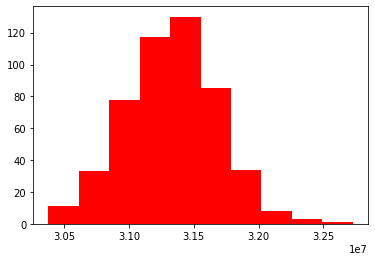

In [91]:
plt.hist(SSE_random, color = 'r')

In [92]:
SSE_mean = np.mean(SSE_random)
SSE_std = np.std(SSE_random)

In [93]:
SSE_mean

31326920.016708534

In [94]:
SSE_std

358243.672077255

**Question: Does your clustering represent real or spurious patterns in the data? Explain your answer.**

**Answer:** The SSE values are likely to each other and so the clustering represents spurious patterns of the data.